<a href="https://colab.research.google.com/github/Jpan2005/ML/blob/main/Regression_Model_w_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🧮 Univariate Linear Regression — Gradient Descent from Scratch**

This notebook is a hands-on implementation of **univariate linear regression** using **gradient descent**, built entirely with NumPy.

### 📌 Purpose
This is a **learning project** I completed after studying the theory of gradient descent and cost minimization. It’s intended to reinforce the fundamentals by coding the entire process manually — no ML libraries used.

### 🧰 Highlights
- Visualizes raw data and regression output
- Implements the cost function and its gradients step-by-step
- Performs gradient descent iteratively and tracks convergence
- Plots the learned regression line and model equation

> ✨ Built for learning - hands-on implementation  
> 👤 Author: *Jason Pan*  
> 🗓️ Last updated: June 18 2025  





In [ ]:
url = 'https://raw.githubusercontent.com/Jpan2005/ML/refs/heads/main/weatherHistory.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(url)
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
#Generate correlation matrix
df.corr(numeric_only = True)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


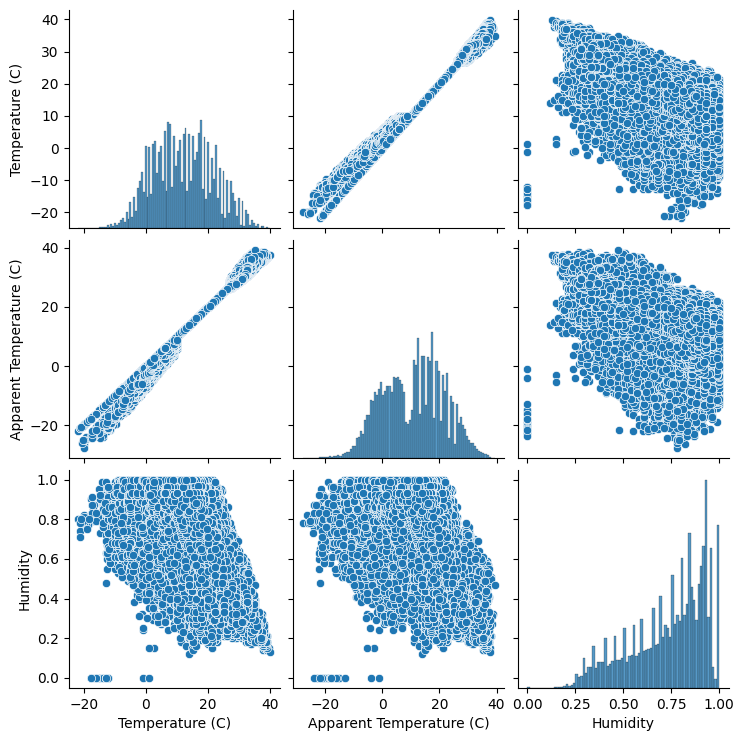

In [ ]:
import seaborn as sns
# Generate Pairplot to visualize correlations
sns.pairplot(df, x_vars=["Temperature (C)", "Apparent Temperature (C)", "Humidity"], y_vars=["Temperature (C)", "Apparent Temperature (C)", "Humidity"])

In [ ]:
# Compute the cost function for a choosen w and b
def compute_cost(x, y, m, w, b):
  cost = 0

  for i in range(m):
    y_predict = w * x[i] + b
    cost = cost + (y_predict - y[i]) ** 2

  cost = 1/(2*m) * cost
  return cost


In [ ]:
# Helper function to find the gradient for a certain point (b,w) on the loss function
def find_gradient(x, y, m, w, b):
  dj_dw = 0
  dj_db = 0

  # Use the calculus-derived formula
  for i in range(m):
    y_predict = w * x[i] + b
    dj_dw += (y_predict - y[i])*x[i]
    dj_db += (y_predict - y[i])

  dj_dw = 1/m * dj_dw
  dj_db = 1/m * dj_db

  return dj_dw, dj_db

In [ ]:
# Gradient Descent Algorithm
def gradient_descent(x, y, m, alpha, num_iter, w, b):
    J_last = compute_cost(x, y, m, w, b)

    for i in range(num_iter):
      # Find the gradient
      dj_dw, dj_db = find_gradient(x, y, m, w, b)

      # Update w,b
      w = w - alpha * dj_dw
      b = b - alpha * dj_db

      # Calculate the new cost function
      # Early stopping to save computational power
      J_new = compute_cost(x, y, m, w, b)
      if(abs(J_last - J_new) <= 10e-4):
        break;
      else:
        J_last = J_new

      #Print out the iteration data every 10 iterations
      if(i%10==0):
        print(f"Iteration: {i:4} Cost: {J_new:0.2e}",
              f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
              f"w: {w: 0.3e}, b:{b: 0.5e}")


    return w, b


In [ ]:
# We are going to perform linear regression on Temperature (Y) and Apparent Temperature (X)
# y = w*x + b
x = df['Apparent Temperature (C)'].to_numpy()
y = df['Temperature (C)'].to_numpy()
m = len(x)

w_init = 0
b_init = 0

# Gradient descent settings
iterations = 500
alpha = 1.0e-3

w, b = gradient_descent(x, y, m, alpha, iterations, w_init, b_init)

print(f"The regression line formula is: f(x) = {w:.3f} * x + {b:.3f}\n")

Iteration:    0 Cost: 6.96e+01 dj_dw: -2.309e+02, dj_db: -1.193e+01   w:  2.309e-01, b: 1.19327e-02
Iteration:   10 Cost: 2.26e+00 dj_dw: -1.628e+01, dj_db: -1.873e+00   w:  9.380e-01, b: 5.61786e-02
Iteration:   20 Cost: 1.91e+00 dj_dw: -1.102e+00, dj_db: -1.157e+00   w:  9.875e-01, b: 6.95703e-02
Iteration:   30 Cost: 1.90e+00 dj_dw: -3.019e-02, dj_db: -1.101e+00   w:  9.906e-01, b: 8.07308e-02
Iteration:   40 Cost: 1.88e+00 dj_dw:  4.537e-02, dj_db: -1.092e+00   w:  9.903e-01, b: 9.16834e-02
Iteration:   50 Cost: 1.87e+00 dj_dw:  5.047e-02, dj_db: -1.086e+00   w:  9.898e-01, b: 1.02572e-01
Iteration:   60 Cost: 1.86e+00 dj_dw:  5.060e-02, dj_db: -1.081e+00   w:  9.893e-01, b: 1.13406e-01
Iteration:   70 Cost: 1.85e+00 dj_dw:  5.038e-02, dj_db: -1.076e+00   w:  9.888e-01, b: 1.24186e-01
Iteration:   80 Cost: 1.84e+00 dj_dw:  5.014e-02, dj_db: -1.070e+00   w:  9.883e-01, b: 1.34914e-01
Iteration:   90 Cost: 1.83e+00 dj_dw:  4.989e-02, dj_db: -1.065e+00   w:  9.878e-01, b: 1.45589e-01


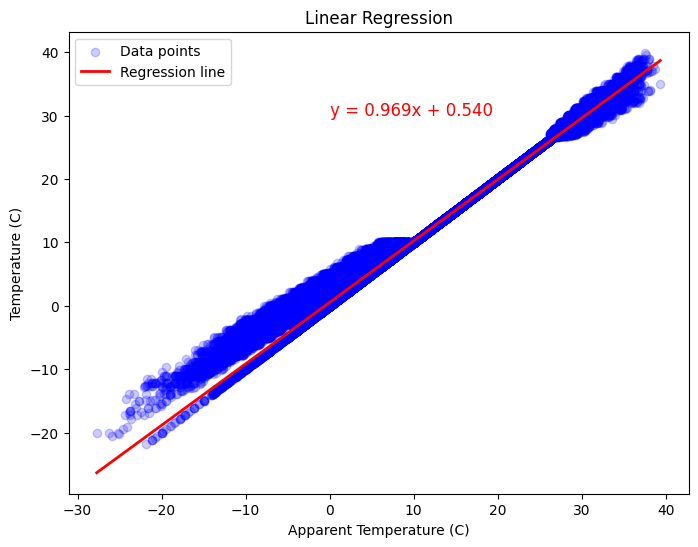

In [ ]:
# Plot the regression line
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Data points', alpha=0.2)

# Regression line
x_line = np.linspace(x.min(), x.max(), 50)
y_line = w * x_line + b
plt.plot(x_line, y_line, color='red', label='Regression line', linewidth=2)
equation_text = f"y = {w:.3f}x + {b:.3f}"
plt.text(0, 30, equation_text, color='red', fontsize=12)
plt.xlabel("Apparent Temperature (C)")
plt.ylabel("Temperature (C)")
plt.title("Linear Regression")
plt.legend()
plt.show()